In [148]:
import pandas as pd
import numpy as np
from pandas.core.frame import DataFrame

In [149]:
# Methods for plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter(data: DataFrame, x_col, y_col):
    plt.scatter(data[x_col], data[y_col])
    plt.show()

def plot_histogram(data: DataFrame, column):
    sns.displot(data=data,x=column,kde=True)
    plt.show()

def plot_boxplot(data: DataFrame, cols):
    data.boxplot(column=cols)
    plt.show()

def create_heatmap_mask(corr_data: DataFrame):
    corr_mask = np.zeros_like(corr_data)
    corr_mask[np.triu_indices_from(corr_mask)] = True
    return corr_mask

### Import data and describe it

In [150]:

loans_df = pd.read_csv('Data/loan_data.csv')

print(f'The loan data has the following characteristics: \n{loans_df.describe()}')
loans_df.head()

The loan data has the following characteristics: 
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### **Purpose** column is categorical and has to be one hot encoded. 

In [151]:
# Unique values in Purpose column
for col in loans_df.columns:
    set_unique_values = set(loans_df[col])
    if len(set_unique_values) < 50:
        print(f'The {col} column contains {len(set_unique_values)} unique values: \n{set_unique_values}')
        print('***********************************************************************************************************************************')

def one_hot_encoder(data: DataFrame, col: str):
    value: int = 0
    unique_values = set(data[col])
    for unique_value in unique_values:
        data[col] = data[col].replace(unique_value, value)
        print(f'{unique_value} is replced with {value}.')
        value += 1
    return data


loans_df = one_hot_encoder(loans_df, 'purpose')

The credit.policy column contains 2 unique values: 
{0, 1}
***********************************************************************************************************************************
The purpose column contains 7 unique values: 
{'educational', 'major_purchase', 'debt_consolidation', 'all_other', 'home_improvement', 'credit_card', 'small_business'}
***********************************************************************************************************************************
The fico column contains 44 unique values: 
{642, 772, 647, 777, 652, 782, 657, 787, 662, 792, 667, 797, 672, 802, 677, 807, 682, 812, 687, 817, 692, 822, 697, 827, 702, 707, 712, 717, 722, 727, 732, 737, 612, 742, 617, 747, 622, 752, 627, 757, 632, 762, 637, 767}
***********************************************************************************************************************************
The inq.last.6mths column contains 28 unique values: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,

#### Check for bad data

In [152]:
# Null or NaN values present? 
print(f'Presence of null values in Loans data: \n{loans_df.isnull().sum()}')
print('***********************************************************************************************************************************')
print(f'Presence of NaN values in Loans data: \n{loans_df.isnull().sum()}')
print('***********************************************************************************************************************************')
print(f'Presence of negatives values in Loans data: \n{loans_df[loans_df < 0].sum()}')


Presence of null values in Loans data: 
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64
***********************************************************************************************************************************
Presence of NaN values in Loans data: 
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64
***********************************************************************************************************************

### Outlier Analysis using IQR

In [153]:
# Check for outliers
# Outlier analysis by skewness. skewness should lie between -1, 1
skewness_loans = loans_df.skew()
print(f'The skewness of each column of bags data is given by:\n{skewness_loans}.')
skewed_columns = skewness_loans[(skewness_loans < -1) | (skewness_loans > 1)].index.values
print(f'The following columns exhibit skewness beyond acceptable limits hinting at presence of outliers. \n{skewed_columns}')
#

The skewness of each column of bags data is given by:
credit.policy        -1.539621
purpose               0.556777
int.rate              0.164420
installment           0.912522
log.annual.inc        0.028668
dti                   0.023941
fico                  0.471260
days.with.cr.line     1.155748
revol.bal            11.161058
revol.util            0.059985
inq.last.6mths        3.584151
delinq.2yrs           6.061793
pub.rec               5.126434
not.fully.paid        1.854592
dtype: float64.
The following columns exhibit skewness beyond acceptable limits hinting at presence of outliers. 
['credit.policy' 'days.with.cr.line' 'revol.bal' 'inq.last.6mths'
 'delinq.2yrs' 'pub.rec' 'not.fully.paid']


#### Based on the skewness of each column we may conclulde that *credit.policy* is left skewed and *days.cr.line*, *revol.bal*, *inq.last.6mnth*, *delinq.2yrs*, *pub.rec*, *not.fully.paid* are right skewed which indicates the presence of outliers. 
- In case of the target column, *not.fully.paid* , the skewness could indicate a class imbalance requiring further analysis.
- We can remove outliers outright or replace outliers with mean/median values based on their frequency, and the mean and median values of the columns.
- The categorical columns can be said to have class imbalance when they exhibit high degree of skewness. 


*****************************************days.with.cr.line*****************************************
Max: 17639.95833
Mean: 4560.767196529213
Min:178.9583333
Median: 4139.958333.
The column contains 346 outliers which comprises of 3.612% of the data.
Outlier: 764     10110.00000
890     10110.00000
1815    10110.00000
2229    10110.04167
8884    10140.00000
           ...     
8531    16260.00000
6014    16350.00000
5801    16652.00000
7553    17616.00000
8430    17639.95833
Name: days.with.cr.line, Length: 346, dtype: float64


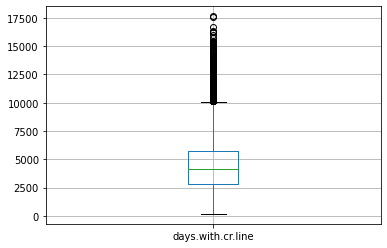

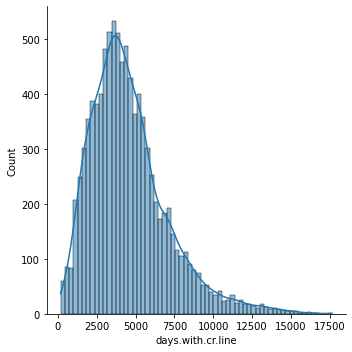

**************************************************************************************************
*****************************************revol.bal*****************************************
Max: 1207359
Mean: 16913.963875548132
Min:0
Median: 8596.0.
The column contains 780 outliers which comprises of 8.144% of the data.
Outlier: 4850      40868
1755      40868
1834      40882
8163      40904
8560      40915
         ...   
8034     407794
9149     508961
9307     602519
9042     952013
9535    1207359
Name: revol.bal, Length: 780, dtype: int64


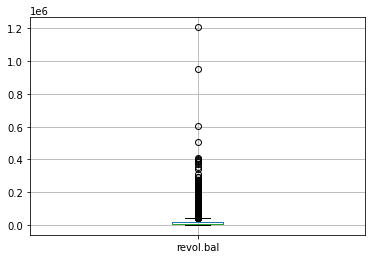

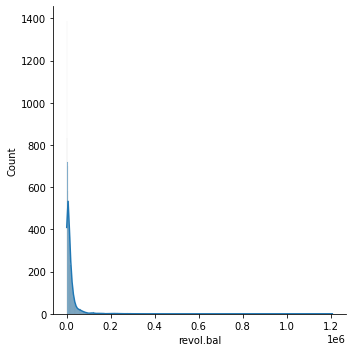

**************************************************************************************************
*****************************************inq.last.6mths*****************************************
Max: 33
Mean: 1.5774692002505741
Min:0
Median: 1.0.
The column contains 478 outliers which comprises of 4.991% of the data.
Outlier: 9437     6
8642     6
8486     6
8610     6
7901     6
        ..
8018    27
8026    28
8037    31
8409    32
7714    33
Name: inq.last.6mths, Length: 478, dtype: int64


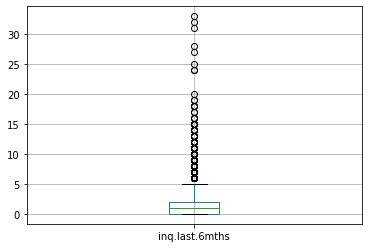

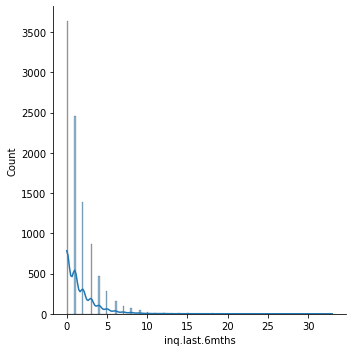

**************************************************************************************************
*****************************************delinq.2yrs*****************************************
Max: 13
Mean: 0.1637084986427229
Min:0
Median: 0.0.
The column contains 1120 outliers which comprises of 11.693% of the data.
Outlier: 2247     1
5695     1
7925     1
1638     1
2259     1
        ..
1525     6
8118     7
8234     8
8548    11
7789    13
Name: delinq.2yrs, Length: 1120, dtype: int64


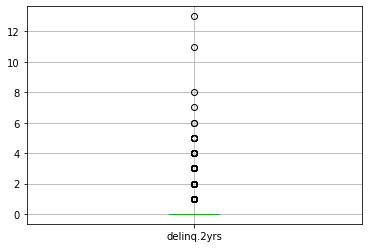

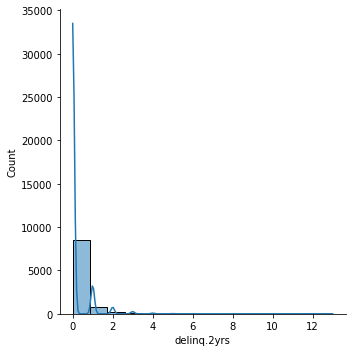

**************************************************************************************************
*****************************************pub.rec*****************************************
Max: 5
Mean: 0.06212152850281896
Min:0
Median: 0.0.
The column contains 559 outliers which comprises of 5.836% of the data.
Outlier: 3314    1
2588    1
181     1
880     1
3316    1
       ..
3461    3
8291    3
6575    3
7276    4
8324    5
Name: pub.rec, Length: 559, dtype: int64


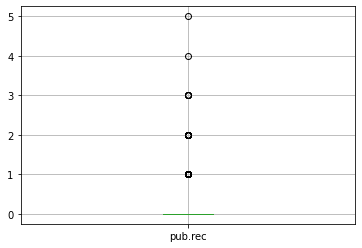

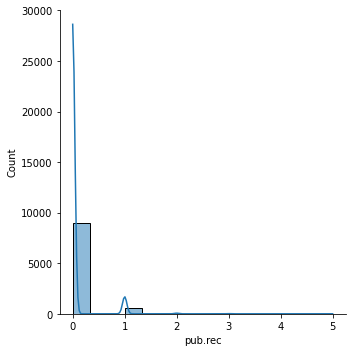

**************************************************************************************************


In [154]:
# Clean up outliers
# Histogram plot of the skewed columns
def get_outliers(data:DataFrame):
    data = data.sort_values()
    q3 = data.quantile(.75)
    q1 = data.quantile(.25)
    iqr = q3 - q1
    return data[((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr)))]

analyze_columns = ['days.with.cr.line','revol.bal', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

total_data_count = len(loans_df)
for col in analyze_columns:
    print(f'*****************************************{col}*****************************************')
    print(f'Max: {loans_df[col].max()}\nMean: {loans_df[col].mean()}\nMin:{loans_df[col].min()}\nMedian: {loans_df[col].median()}.')
    outliers = get_outliers(loans_df[col]) 
    print(f'The column contains {len(outliers)} outliers which comprises of {round((len(outliers)/total_data_count)*100, 3)}% of the data.')
    print(f'Outlier: {outliers}')
    plot_boxplot(loans_df,col)
    plot_histogram(loans_df, column=col)
    print('**************************************************************************************************')

#### The column *days.with.cr.line* will be applicable for outlier removal.
- *revol.bal* refers to the borrower's revolving balance (amount **unpaid** at the end of the credit card billing cycle). As such this amount tends to 0 in larger number of cases since the goal of most borrower is to pay their credit card balance within the billing cycle thus making revoling balance as 0. The outliers here may indicate an relationship existing with the target column. Hence, we will allow the outliers in this case. 
- *inq.last.6mnths* refers to the number of enquires that were done on a borrower's profile by prospective creditiors in the last 6 months. A higher number as compared to borrower's with similar credit profile may indicate multiple application and rejections of loan requests. The outliers start from 6 and go all the way to 33. The outliers in this case may indicate potential borrower's who may not be able to pay back their loan based on the higher number of inquires against one's profile in the last 6 months period. 
- *delin.2yrs* refers to the number of times a borrowers has been delinquent on a payment for over 30 days. The data in this column will heavily skew towards 0 since majority of people try to pay back their credit card bills within the billing cycle. The outliers which start at 1 and go all the to 13 refer to the number of times a borrower has been delinquent in the last 2 year period indicating a potential correlation between the column and the ability to fully pay back a loan. 
- *pub.rec* rfers to the number of records against a borrower's profile. These records tend to be derogatory in nature and can negatively impact the credit worthiness (ability to make their payments on time & fully) of a borrower. The normal trend of borrower's is to try and avoid having such records against their profile hence the data tends to have the highest frequency of 0. The outliers can be an indication of the ability to pay back a loan fully. 

In [155]:
analyze = 'days.with.cr.line'
outliers = get_outliers(loans_df[analyze])
print(f'Removing {len(outliers)} from data.')
loans_df = loans_df.drop(axis=0, labels=outliers.index)

print(f'Post clearing outliers, the column has following skweness:\n{loans_df[analyze].skew()}')

Removing 346 from data.
Post clearing outliers, the column has following skweness:
0.5045547165812968


### Correlation analysis using heatmap

<AxesSubplot:>

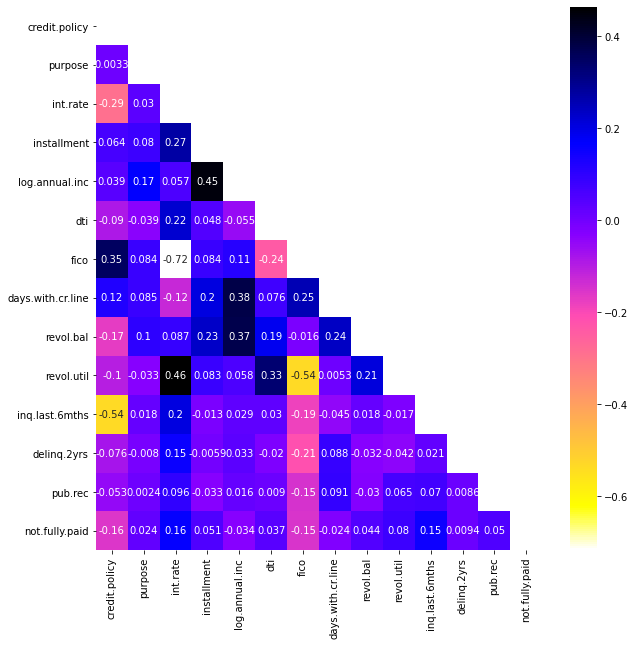

In [156]:
def correlation_coefficients(data: DataFrame): return data.corr(method='pearson')

corr_before = correlation_coefficients(loans_df)
corr_mask = create_heatmap_mask(corr_before)
_, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_before, xticklabels=corr_before.columns, yticklabels=corr_before.columns, annot=True, cmap='gnuplot2_r', mask=corr_mask, ax=ax)

- *fico* and *credit.policy* exhibit high collinearity compared to the rest and they also exhibit high negative correlation with the target column (*not.fully.paid*). *fico* is dropped becuase *credit.policy* shows higher correlation with target column. 
- *fico* and *int.rate* exhibit high negative collinearity. 
- *revol.util* and *int.rate* exhibit high collinearity compared to the rest but *revo.util* has low correlation of just **0.08** with target column and thus can be dropped. 
- *log.annual.inc* and *installment* exhibit high collinearity and both exhibit fairly low correlation with the target column. 
- *days.with.cr.line* and *log.annual.inc* exhibit high collinearity and fairly low correlation with the target column but *log.annual.income* has higher correlation with the target. Hence, we may drop *days.with.cr.line* and *installment* columns. 
- *revol.bal* and *log.annual.income* exhibits high collinearity amongst them and both have fairly low correlation with the target column with *revol.util* having correlation of **0.044** which is lower that of *installment*. *revol.bal* may be dropped. 
- *revol.util* and *dti* exhibit high collinearity amongst them and low correlation with the target and hence may be dropped. 

In [157]:
# Remove low correlation columns 
loans_df_prepared = loans_df[['credit.policy','int.rate', 'inq.last.6mths', 'pub.rec', 'not.fully.paid']]

### Split data into train and test set

In [160]:
from sklearn.model_selection import train_test_split

predictor_cols = loans_df_prepared[['credit.policy','int.rate', 'inq.last.6mths', 'pub.rec']]
target_col = loans_df_prepared['not.fully.paid']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(predictor_cols, target_col, train_size=0.75, random_state=3,stratify=target_col)

print(f'Shape of training data: \n  Predictors: {X_Train.shape}\n  Target: {Y_Train.shape}')
print(f'Shape of test data: \n  Predictors: {X_Test.shape}\n  Target: {Y_Test.shape}')

Shape of training data: 
  Predictors: (6924, 4)
  Target: (6924,)
Shape of test data: 
  Predictors: (2308, 4)
  Target: (2308,)


### Decesion Tree classifier model